In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2023-07-21 19:51:35.444278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 19:51:35.537153: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-21 19:51:35.539762: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-21 19:51:35.539771: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [14]:
# Set the path to the Kaggle Cats and Dogs dataset
dataset_path = './datos/downloads/dogs-vs-cats-mini'
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

In [15]:
# Constants
img_width, img_height = 224, 224
batch_size = 32
num_epochs = 10

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base ResNet50 model
for layer in base_model.layers:
    layer.trainable = False


In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n // batch_size
)

Epoch 1/10
62/62 [==============================] - 129s 2s/step - loss: 0.6827 - accuracy: 0.5528 - val_loss: 0.6776 - val_accuracy: 0.5827
Epoch 2/10
62/62 [==============================] - 126s 2s/step - loss: 0.6715 - accuracy: 0.5777 - val_loss: 0.6663 - val_accuracy: 0.5897
Epoch 3/10
62/62 [==============================] - 126s 2s/step - loss: 0.6578 - accuracy: 0.6174 - val_loss: 0.6641 - val_accuracy: 0.5948
Epoch 4/10
62/62 [==============================] - 126s 2s/step - loss: 0.6598 - accuracy: 0.6016 - val_loss: 0.6578 - val_accuracy: 0.6008
Epoch 5/10
62/62 [==============================] - 126s 2s/step - loss: 0.6588 - accuracy: 0.6026 - val_loss: 0.6604 - val_accuracy: 0.5948
Epoch 6/10
62/62 [==============================] - 126s 2s/step - loss: 0.6626 - accuracy: 0.5986 - val_loss: 0.6610 - val_accuracy: 0.6119
Epoch 7/10
62/62 [==============================] - 127s 2s/step - loss: 0.6566 - accuracy: 0.6118 - val_loss: 0.6745 - val_accuracy: 0.5847
Epoch 8/10
62

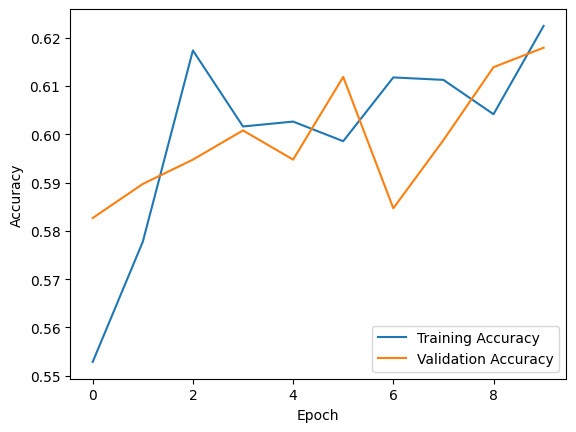

In [19]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
